# Transportation Operations and Solutions Question
1) The Bureau of Public Roads flow curve, or "BPR Curve", relates traffic density to vehicle speed, similar to the speed/flow/density models presented in Chapter 7 in Vanek et al. **Sustainable Transportation Engineering**. The BPR curve equation is as follows: 

$ t = t_{0} \Bigg( 1 + \alpha(\frac v v_{c}) \Bigg)^\beta $

$ t $ = travel time <br/>
$ t_{0} $ = free-flow travel time <br/>
$ v $ = volume (cars / hour) <br/>
$ v_{c} $ = practical capacity (cars / hour) <br/>
$ \beta $ = Parameters derived from travel surveys to fit data for a particular roadway

In this problem, you will model a 30-mile highway with three lanes of inbound traffic. The single-direction capacity is 2500 $ vehicles / lane / hr $. 

Traffic survey data fits produced values of $ \alpha $ = 1.5 and $ \beta $ = 4, and a free-dlow vehicle velocity of 60 mph. Value lost time due to congestion at $12/hr and assume one occupant per vehicle. Throughout this problem, ignore transition effects between peak and non-peak conditions

### a) Plot $ t $ as a function of $ v $ for traffic volume values from 0 to 3000 $ cars / lane / hr $

In [159]:
import pandas as pd
import math
import os

In [78]:
VOLUME_PRACTICAL_CAPACITY_PER_LANE = 2500. # 3 lanes @ 2500 vehicles / lane / hr
# At 60 mph, a 30-mile highway would take 30 minutes
FREE_FLOW_TRAVEL_TIME = 30. # minutes
ALPHA = 1.5
BETA = 4.
NUM_LANES = 3.
HIGHWAY_LENGTH = 30. # miles 
VALUE_LOST_DUE_TO_CONGESTION = 12. # $ /hr

def get_travel_time(free_flow_travel_time, volume_cars_per_hr, volume_practical_capacity, alpha, beta):
    
    inner_term = 1 + (alpha * (volume_cars_per_hr / volume_practical_capacity)**beta)
    travel_time = free_flow_travel_time * inner_term
    
    return travel_time

In [79]:
rows = []

for volume_cars_per_hr in range(0, 3001):
    row = {
        "t" : get_travel_time(
            FREE_FLOW_TRAVEL_TIME, 
            NUM_LANES * volume_cars_per_hr, 
            VOLUME_PRACTICAL_CAPACITY_PER_LANE * NUM_LANES, 
            ALPHA, BETA
        ),
        "v" : NUM_LANES * volume_cars_per_hr,
        "inner_term" : 1 + (ALPHA * ((NUM_LANES * volume_cars_per_hr) / VOLUME_PRACTICAL_CAPACITY)**BETA),
        "volume_practical_capacity": VOLUME_PRACTICAL_CAPACITY,
        "volume" : NUM_LANES * volume_cars_per_hr,
        "free_flow_travel_time": FREE_FLOW_TRAVEL_TIME
    }
    
    rows.append(row)

travel_time_df = pd.DataFrame(rows)
travel_time_df["veh_per_lane_per_hr"] = travel_time_df["v"] / NUM_LANES

<AxesSubplot:xlabel='volume (veh / lane / hr)', ylabel='time (minutes)'>

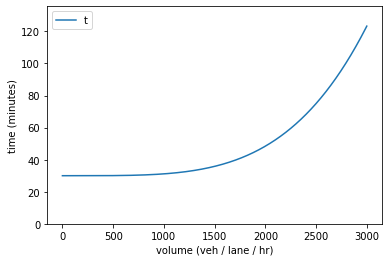

In [48]:
travel_time_df.plot("veh_per_lane_per_hr", "t", 
    xlabel = "volume (veh / lane / hr)", 
    ylabel ="time (minutes)", 
    ylim=[0, max(travel_time_df["t"]) + .1 * (max(travel_time_df["t"]))], 
    kind = "line"
)

### b) Suppose 2000 cars per lane per hour travel in the morning rush hour for a 2-hour rush period each workday morning. What is their average speed?

In [80]:
NUM_VEHICLES_PER_LANE = 2000.
NUM_PEOPLE_PER_VEHICLE = 1.
NUM_HOURS_RUSH_HOUR = 2.

travel_time_in_minutes = get_travel_time(
    FREE_FLOW_TRAVEL_TIME, 
    NUM_VEHICLES_PER_LANE * NUM_LANES, 
    VOLUME_PRACTICAL_CAPACITY_PER_LANE * NUM_LANES, 
    ALPHA, 
    BETA
)

In [83]:
average_mph = (60 / travel_time_in_minutes) * HIGHWAY_LENGTH

print("{:.2f} mph at average travel time of {:.2f} minutes".format(average_mph, travel_time_in_minutes))

37.17 mph at average travel time of 48.43 minutes


### c) What is the value of time lost in one morning compared to the same situation where the same number of cars travel the length of the road in time $ t_0 $?

This assumes that value lost due to congestion is $12/hour _per person_

In [68]:
additional_travel_time_per_person_mins = travel_time_in_minutes - FREE_FLOW_TRAVEL_TIME
additional_travel_time_per_person_hr = additional_travel_time_per_person_mins / 60.

In [77]:
value_of_time_lost = additional_travel_time_per_person_hr \
    * (NUM_LANES * NUM_VEHICLES_PER_LANE * NUM_PEOPLE_PER_VEHICLE) \
    * NUM_HOURS_RUSH_HOUR

print("Total value of time lost per morning: ${:,.2f}".format(value_of_time_lost))

Total value of time lost per morning: $3,686.40


### d) The cost of building a highway in an urban setting is about $11 mil per mile. How long would it take to recover those costs in time saved if an extra lane of traffic were built? 

In [81]:
travel_time_in_minutes_w_addtl_capacity = get_travel_time(
    FREE_FLOW_TRAVEL_TIME, 
    NUM_VEHICLES_PER_LANE * NUM_LANES, 
    VOLUME_PRACTICAL_CAPACITY_PER_LANE * 4, 
    ALPHA, 
    BETA
)

In [86]:
print("Rush hour travel time without new lane: {:,.2f}".format(travel_time_in_minutes))
print("Rush hour travel time with new lane: {:,.2f}".format(travel_time_in_minutes_w_addtl_capacity))

print("Number of minutes saved per vehicle with additional lane: {:,.2f}".format(
    travel_time_in_minutes - travel_time_in_minutes_w_addtl_capacity
))

Rush hour travel time without new lane: 48.43
Rush hour travel time with new lane: 35.83
Number of minutes saved per vehicle with additional lane: 12.60


In [93]:
num_hours_saved_per_vehicle = (travel_time_in_minutes - travel_time_in_minutes_w_addtl_capacity)  \
    / 60 \
    * NUM_PEOPLE_PER_VEHICLE

amount_saved_per_person = num_hours_saved_per_vehicle * VALUE_LOST_DUE_TO_CONGESTION
amount_saved_per_person_per_morning = amount_saved_per_person * NUM_HOURS_RUSH_HOUR

amount_saved_per_morning = amount_saved_per_person_per_morning \
    * NUM_LANES \
    * NUM_VEHICLES_PER_LANE \
    * NUM_PEOPLE_PER_VEHICLE

total_cost_of_additional_lane_in_mm = 11 * HIGHWAY_LENGTH

In [101]:
num_days_to_recup_costs = round((total_cost_of_additional_lane_in_mm * 1000000) / amount_saved_per_morning, 0)

print("Number of years to recup costs: {:,.2f}".format(num_days_to_recup_costs / 365))

Number of years to recup costs: 29.90


# Vehicle Load Equation and Fuel Demand
2) A MATLAB script file (ENGY502_vehicle_drivecalcs_F2021.m) and an MS Excel file (ENGY502_vehicle_drivecalcs_F2021.xslx) provide a means for calculating the transient load and rate of fuel consumption for a ground vehicle for a given drive-cycle. The load $ W_{veh} $ and the rate of fuel energy consumed $ \frac {dE_{fuel}} {dt} $  (shown in equation 1) are integrated

$ \frac {dE_{fuel}} {dt} = \frac {1} {\eta_{tr}} \Bigg( \Bigg[ m_{veh} \Bigg(max(0, \frac {dv_{veh}} {dt}) + C_{roll} g \cos (\alpha_{road}) + g \sin(\alpha_{road})\Bigg) + \frac {\rho_air C_{drag} A_{veh} (v_{veh} - v_{air})^2} {2} \Bigg] + \frac {W_{acc}} {\eta_{elec}}$ 

Drive-train efficiency $\eta_{tr}(t) $ can vary with time due to changes in engine efficiency with power and RPM. This will identify power plant demands and fuel consumption $ \Delta E_{fuel} $ for various drive cycles.

Consider a Subaru Outback ($ m_{veh} = 1700 kg, A_{veh}=2.56 m^2, C_{drag} = 0.37, C_{roll} = 0.11, W_{acc} = 0.5 kW $) for this problem going through various drive cycles including the FTP-75 and HWFET drive cycles. Assuming the following simple relationship works for calculating the instantaneous $ \eta_{tr} $

$ \eta_{tr} = \alpha \Bigg[ \exp \Bigg(- \frac {W_{veh}} {W_{1}}\Bigg) - \exp \Bigg(- \frac {W_{veh}} {W_{2}}\Bigg)\Bigg] $ where $ W_{veh} $ is in kW. 

For this problem, we will assume $ a = 0.4, W_{1} = 200 kW, W_{2} = 17 kW $

In [104]:
ALPHA = 0.4
W_1 = 200 # kW. What does W_1 represent?
W_2 = 17  # kW. What does W_2 represent?

### a) Given the data above, make a plot of fuel economy in mpg for a Subaru Outback as a function of constant vehicle speeds from 10 to 100 mph. Consider how a luggage rack adds 80 kg of mass and drag resistance. Also consider how snow tires increase rolling resistance. Using references to estimate the effects of a luggage rack and snow tires, overlay your plots of fuel economy vs. vehicle speed for an Outback with a rack, with snow tires, and with both.

**Assumption**: Horizontal Road surface. Not uphill / downhill <br/>
**Assumption**: Air density equals 1.225 <br/>
**Assumption**: Wind velocity is 0

In [258]:
MASS_OF_VEHICLE_KEY = "mass"
DRAG_COEFFICIENT_KEY = "drag_coefficient"
FRONTAL_AREA_OF_VEHICLE_KEY = "area_vehicle"
ROLLING_RESISTANCE_KEY = "rolling_resistance"
ACCESSORY_POWER_DEMAND_KEY = "accessory_power_demand"
ENGINE_EFFICIENCY_ALPHA_CONSTANT_KEY = "eta_alpha_constant"
ENGINE_EFFICIENCY_WORK_CONSTANT_1_KEY = "eta_w1_constant"
ENGINE_EFFICIENCY_WORK_CONSTANT_2_KEY = "eta_w2_constant"


GRAVITATIONAL_CONSTANT = 9.81 # m/s^2
ANGLE_OF_ROAD = 0 # degrees
AIR_DENSITY = 1.149 # kg / m^3
AIR_VELOCITY = 0 # m / s

subaru_config = {
    MASS_OF_VEHICLE_KEY : 1700, # kg
    FRONTAL_AREA_OF_VEHICLE_KEY : 2.56, #m^2
    DRAG_COEFFICIENT_KEY : 0.37, # unitless
    ROLLING_RESISTANCE_KEY : 0.11, # unitless
    ACCESSORY_POWER_DEMAND_KEY : 0.5, #kW
    ENGINE_EFFICIENCY_ALPHA_CONSTANT_KEY: 0.4,
    ENGINE_EFFICIENCY_WORK_CONSTANT_1_KEY: 200.,
    ENGINE_EFFICIENCY_WORK_CONSTANT_2_KEY: 17.,
}

def get_instantaneous_drivetrain_efficiency(alpha, work_vehicle, w_1, w_2):
    # what does w_1 and w_2 represent?
    
    inner_term_one = math.exp( - (work_vehicle / w_1))
    inner_term_two = math.exp( - (work_vehicle / w_2))
    
    inner_term = inner_term_one - inner_term_two
    
    return alpha * inner_term

def get_m_per_s_from_mph(mph):
    
    return mph * 1609.344 / 3600

def get_denominator(unit):
    
    valid_units = ["kW", "W"]
    if unit not in valid_units:
        raise ValueError("Unit to return ({}) not one of valid options: {}".format(unit, valid_units))
    
    denominator = 1. if unit == "W" else 1000.
    
    return denominator

In [145]:
def get_power_demand_drag(drag_coefficient, frontal_area_of_vehicle, air_density, vehicle_velocity_m_per_s, air_velocity, unit = "W"):
    """
    Gets power demand of vehicle due to vehicle drag
    
    get_power_demand_drag(0.33, 2.2, 1.149, get_m_per_s_from_mph(3.), 0, "kW") = 0.001006
    """
    
    valid_units = ["kW", "W"]
    if unit not in valid_units:
        raise ValueError("Unit to return ({}) not one of valid options: {}".format(unit, valid_units))
    
    denominator = 1. if unit == "W" else 1000.
    return (
        drag_coefficient \
        * frontal_area_of_vehicle \
        * (air_density / 2) \
        * (vehicle_velocity_m_per_s - air_velocity)**2
        ) \
        * vehicle_velocity_m_per_s  \
    / denominator

In [146]:
get_power_demand_drag(0.33, 2.2, 1.149, get_m_per_s_from_mph(3.), 0, "kW")

0.0010060731788353794

In [147]:
def get_power_demand_roll(rolling_resistance_coefficient, vehicle_mass_kg, gravitational_constant, vehicle_velocity_m_per_s, unit = "W"):
    """
    Gets power demand of vehicle due to rolling resistance 
    
    get_power_demand_roll(0.009, 3000., GRAVITATIONAL_CONSTANT, get_m_per_s_from_mph(8.6), "kW") = 1.0183
    """
    valid_units = ["kW", "W"]
    if unit not in valid_units:
        raise ValueError("Unit to return ({}) not one of valid options: {}".format(unit, valid_units))
    
    denominator = 1. if unit == "W" else 1000.
    
    return (
        vehicle_mass_kg \
        * rolling_resistance_coefficient \
        * gravitational_constant \
        * vehicle_velocity_m_per_s
    ) / denominator

In [154]:
def get_power_demand_acceleration(vehicle_mass_kg, vehicle_velocity_m_per_s, vehicle_acceleration_m_per_s, unit = "W"):
    
    denominator = get_denominator(unit)
    return (
        vehicle_mass_kg \
        * vehicle_acceleration_m_per_s \
        * vehicle_velocity_m_per_s
    ) / denominator

In [157]:
get_power_demand_acceleration(3000, get_m_per_s_from_mph(3.0), get_m_per_s_from_mph(3.0), "kW")

5.3958085632

In [320]:
def get_braking_force_n(
    drag_coefficient, 
    rolling_resistance_coefficient,
    vehicle_mass_kg, 
    frontal_area_of_vehicle, 
    gravitational_constant,
    air_density, 
    air_velocity, 
    velocity_vehicle_m_per_s, 
    acceleration_vehicle_m_per_s,
):
    """
    get_braking_force_n(
        drag_coefficient=0.33,
        rolling_resistance_coefficient=0.009,
        vehicle_mass_kg=3000,
        frontal_area_of_vehicle=2.2,
        gravitational_constant=GRAVITATIONAL_CONSTANT,
        air_density=1.149,
        air_velocity=0,
        velocity_vehicle_m_per_s=9.61,
        acceleration_vehicle_m_per_s=-0.268224
    ) = 578.3208
    """
    braking_term_one = (
        drag_coefficient \
        * frontal_area_of_vehicle \
        / 2.
    )
    
    braking_term_two = (
        air_density \
        * (velocity_vehicle_m_per_s - air_velocity) ** 2
    )
    
    braking_term_three = (
        vehicle_mass_kg \
        * (rolling_resistance_coefficient * gravitational_constant + acceleration_vehicle_m_per_s)
    )
    
    
    return max(0, (braking_term_one * braking_term_two) - braking_term_three)

In [321]:
get_braking_force_n(
        drag_coefficient=0.33,
        rolling_resistance_coefficient=0.009,
        vehicle_mass_kg=3000,
        frontal_area_of_vehicle=2.2,
        gravitational_constant=GRAVITATIONAL_CONSTANT,
        air_density=1.149,
        air_velocity=0,
        velocity_vehicle_m_per_s=9.61,
        acceleration_vehicle_m_per_s=-0.268224
    )

578.3208603327001

In [322]:
DATA_DIR_BASE = os.path.join(
    os.path.dirname(os.path.realpath("__file__")),
    "data",
    "hw2"
)

RAW_DATA_DIR = os.path.join(
    DATA_DIR_BASE,
    "raw"
)

cycle_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "ftp_75.csv"))


In [323]:
cycle_df

,time_s,v_mph
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
1870,1870,10.3
1871,1871,7.2
1872,1872,4.0
1873,1873,1.0


In [331]:
TIME_COLNAME = "time_s"
VELOCITY_VEHICLE_MPH_COLNAME = "v_mph"
VELOCITY_VEHICLE_M_PER_S_COLNAME = "v_veh_m_per_s"
ACCELERATION_M_PER_S_COLNAME = "accel_m_per_s"
DELTA_DISTANCE_KM_COLNAME = "delta_distance_km"
TOTAL_DISTANCE_KM_COLNAME = "total_distance_km"
POWER_DEMAND_BRAKING_COLNAME = "brake_force_n"
POWER_DEMAND_DRAG_COLNAME = "power_demand_drag_kw"
POWER_DEMAND_ROLL_COLNAME = "power_demand_rolling_resistance_kw"
POWER_DEMAND_ACCEL_COLNAME = "power_demand_acceleration_kw"
POWER_DEMAND_TOTAL_COLNAME = "power_demand_vehicle_kw"
POWER_DEMAND_ACCESSORIES_COLNAME = "power_demand_accessories_kw"
TOTAL_VEHICLE_ENERGY_COLNAME = "total_vehicle_energy_mj"
AVG_ENERGY_VEHICLE_PER_VKT_COLNAME = "average_e_veh_over_vkt_mj_per_km"

In [359]:
#vehicle_config = subaru_config

vehicle_config = {
    MASS_OF_VEHICLE_KEY : 3000, # kg
    FRONTAL_AREA_OF_VEHICLE_KEY : 2.2, #m^2
    DRAG_COEFFICIENT_KEY : 0.33, # unitless
    ROLLING_RESISTANCE_KEY : 0.009, # unitless
    ACCESSORY_POWER_DEMAND_KEY : 0.6/0.7, #kW
    ENGINE_EFFICIENCY_ALPHA_CONSTANT_KEY: 0.2,
    ENGINE_EFFICIENCY_WORK_CONSTANT_1_KEY: 10000000.,
    ENGINE_EFFICIENCY_WORK_CONSTANT_2_KEY: 10.,
}

cycle_df[VELOCITY_VEHICLE_M_PER_S_COLNAME] = cycle_df.apply(
    lambda x: get_m_per_s_from_mph(x[VELOCITY_VEHICLE_MPH_COLNAME]),
    axis = 1
)

acceleration_array = []
delta_distance_km_array = []
total_distance_km_array = []

for idx, row in cycle_df.iterrows():
    
    if idx == 0:
        acceleration = 0
        delta_distance_km = 0
        total_distance_km = 0
        
    else:
        acceleration = cycle_df.iloc[idx][VELOCITY_VEHICLE_M_PER_S_COLNAME] - cycle_df.iloc[idx - 1][VELOCITY_VEHICLE_M_PER_S_COLNAME] 
        delta_distance_km = ((
            cycle_df.iloc[idx][VELOCITY_VEHICLE_M_PER_S_COLNAME] \
            + cycle_df.iloc[idx - 1][VELOCITY_VEHICLE_M_PER_S_COLNAME] 
            ) / 2 \
            * (cycle_df.iloc[idx][TIME_COLNAME] - cycle_df.iloc[idx - 1][TIME_COLNAME])
            ) / 1000
        
    acceleration_array.append(acceleration)
    delta_distance_km_array.append(delta_distance_km)
  
cycle_df[ACCELERATION_M_PER_S_COLNAME] = acceleration_array
cycle_df[DELTA_DISTANCE_KM_COLNAME] = delta_distance_km_array

for idx, row in cycle_df.iterrows():
    
#     if idx == 0:
#         total_distance_km = 0
        
#     else:
#         total_distance_km = sum(cycle_df[0:idx][DELTA_DISTANCE_KM_COLNAME])
    
    total_distance_km_array.append(sum(cycle_df[0:idx][DELTA_DISTANCE_KM_COLNAME]) + row[DELTA_DISTANCE_KM_COLNAME])

cycle_df[TOTAL_DISTANCE_KM_COLNAME] = total_distance_km_array
    

NameError: name 'ENGINE_EFFICIENCY_ALPHA_CONSTANT_KEY' is not defined

In [360]:
cycle_df[POWER_DEMAND_BRAKING_COLNAME] = cycle_df.apply(
    lambda x: get_braking_force_n(
        drag_coefficient= vehicle_config[DRAG_COEFFICIENT_KEY],
        rolling_resistance_coefficient= vehicle_config[ROLLING_RESISTANCE_KEY],
        vehicle_mass_kg= vehicle_config[MASS_OF_VEHICLE_KEY],
        frontal_area_of_vehicle= vehicle_config[FRONTAL_AREA_OF_VEHICLE_KEY],
        gravitational_constant=GRAVITATIONAL_CONSTANT,
        air_density=AIR_DENSITY,
        air_velocity=AIR_VELOCITY,
        velocity_vehicle_m_per_s=x[VELOCITY_VEHICLE_M_PER_S_COLNAME],
        acceleration_vehicle_m_per_s=x[ACCELERATION_M_PER_S_COLNAME]
    ),
    axis = 1
)

cycle_df[POWER_DEMAND_DRAG_COLNAME] = cycle_df.apply(
    lambda x: 0 if x[POWER_DEMAND_BRAKING_COLNAME] > 0 else get_power_demand_drag(
        drag_coefficient = vehicle_config[DRAG_COEFFICIENT_KEY],
        frontal_area_of_vehicle = vehicle_config[FRONTAL_AREA_OF_VEHICLE_KEY],
        air_density=AIR_DENSITY,
        vehicle_velocity_m_per_s= x[VELOCITY_VEHICLE_M_PER_S_COLNAME],
        air_velocity= AIR_VELOCITY,
        unit = "kW"
    ),
    axis=1
)

cycle_df[POWER_DEMAND_ROLL_COLNAME] = cycle_df.apply(
    lambda x: 0 if x[POWER_DEMAND_BRAKING_COLNAME] > 0 else get_power_demand_roll(
        rolling_resistance_coefficient= vehicle_config[ROLLING_RESISTANCE_KEY],
        vehicle_mass_kg= vehicle_config[MASS_OF_VEHICLE_KEY],
        gravitational_constant= GRAVITATIONAL_CONSTANT,
        vehicle_velocity_m_per_s= x[VELOCITY_VEHICLE_M_PER_S_COLNAME],
        unit = "kW"
    ),
    axis = 1
)

cycle_df[POWER_DEMAND_ACCEL_COLNAME] = cycle_df.apply(
    lambda x: 0 if x[POWER_DEMAND_BRAKING_COLNAME] > 0 else get_power_demand_acceleration(
        vehicle_mass_kg= vehicle_config[MASS_OF_VEHICLE_KEY],
        vehicle_velocity_m_per_s= x[VELOCITY_VEHICLE_M_PER_S_COLNAME],
        vehicle_acceleration_m_per_s= x[ACCELERATION_M_PER_S_COLNAME],
        unit = "kW"
    ),
    axis = 1
)

cycle_df[POWER_DEMAND_ACCESSORIES_COLNAME] = vehicle_config[ACCESSORY_POWER_DEMAND_KEY]

cycle_df[POWER_DEMAND_TOTAL_COLNAME] = cycle_df[POWER_DEMAND_ACCEL_COLNAME] \
    + cycle_df[POWER_DEMAND_ACCESSORIES_COLNAME] \
    + cycle_df[POWER_DEMAND_DRAG_COLNAME] \
    + cycle_df[POWER_DEMAND_ROLL_COLNAME]

In [361]:
cumulative_energy_mj = 0
cumulative_energy_array = []

for idx, row in cycle_df.iterrows():
    if idx == 0:
        cumulative_energy_array.append(0)
        continue
    
    time_diff = cycle_df.iloc[idx][TIME_COLNAME] - cycle_df.iloc[idx - 1][TIME_COLNAME] 
    power_demand_sum = cycle_df.iloc[idx][POWER_DEMAND_TOTAL_COLNAME] + cycle_df.iloc[idx - 1][POWER_DEMAND_TOTAL_COLNAME]
    addtl_energy = time_diff * power_demand_sum / 2000
    
    cumulative_energy_mj += addtl_energy
    cumulative_energy_array.append(cumulative_energy_mj)

cycle_df[TOTAL_VEHICLE_ENERGY_COLNAME] = cumulative_energy_array

cycle_df[AVG_ENERGY_VEHICLE_PER_VKT_COLNAME] = cycle_df.apply(
    lambda x: x[TOTAL_VEHICLE_ENERGY_COLNAME] / x[TOTAL_DISTANCE_KM_COLNAME] if x[TOTAL_DISTANCE_KM_COLNAME] > 0 else 0,
    axis = 1
)

In [275]:
cycle_df[30:38]

,time_s,v_mph,v_veh_m_per_s,accel_m_per_s,delta_distance_km,total_distance_km,brake_force_n
30,30,21.7,9.700768,0.447040,0.009477,0.047587,0.000000
31,31,22.4,10.013696,0.312928,0.009857,0.057065,0.000000
32,32,22.5,10.058400,0.044704,0.010036,0.066922,0.000000
33,33,22.1,9.879584,-0.178816,0.009969,0.076958,312.288269
34,34,21.5,9.611360,-0.268224,0.009745,0.086927,578.331763
35,35,20.9,9.343136,-0.268224,0.009477,0.096672,576.211272
36,36,20.4,9.119616,-0.223520,0.009231,0.106150,440.378040
37,37,19.8,8.851392,-0.268224,0.008986,0.115381,572.479574
